In [12]:
import importlib
imported_module = importlib.import_module("borough_complaints")
importlib.reload(imported_module)

import complaint_borough
import pandas as pd

output = './june-july.csv'

args = {
    'input': './nyc_311_limit.2020.csv',
    'startdate': '06/01/2020',
    'enddate': '07/31/2020',
    'output': output
}

# borough_complaints.main(**args)
print('done!')

done!


In [13]:
df = pd.read_csv(output)
complaint_df = df[['complaint type', 'count']]
complaint_df = complaint_df.groupby(['complaint type'], as_index=False).sum()
complaint_df = complaint_df.sort_values(by='count', ascending=False)
complaint = complaint_df['complaint type'].iloc[0]
complaint = 'HEAT/HOT WATER'

In [15]:
most_common_df = df[df['complaint type'] == complaint]
most_common_df = most_common_df.groupby(df['complaint type']).sum()
print(most_common_df)

                                                   complaint type  \
complaint type                                                      
HEAT/HOT WATER  HEAT/HOT WATERHEAT/HOT WATERHEAT/HOT WATERHEAT...   

                                                  borough  count  
complaint type                                                    
HEAT/HOT WATER  BRONXBROOKLYNMANHATTANQUEENSSTATEN ISLAND  43972  


Text(0.5, 1.0, 'No. of HEAT/HOT WATER complaints across boroughs')

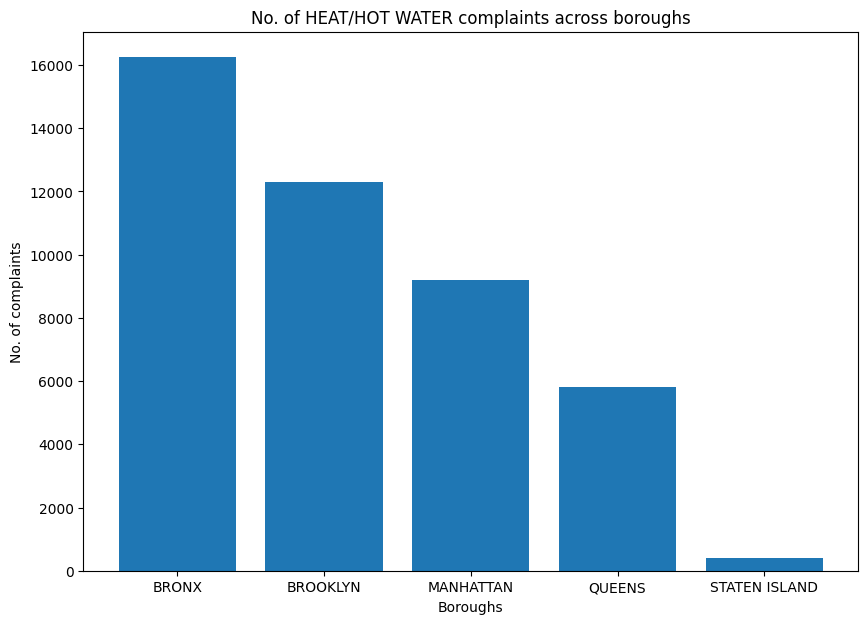

In [8]:
import matplotlib.pyplot as plt 

# Figure Size
fig = plt.figure(figsize =(10, 7))

plt.bar(most_common_df['borough'], most_common_df['count'])

plt.xlabel('Boroughs')
plt.ylabel('No. of complaints')
plt.title('No. of ' + complaint + ' complaints across boroughs')